In [61]:
from IPython.display import display, Image # Displays things nicely
import pandas as pd # Key tool 
import matplotlib.pyplot as plt # Helps plot
import numpy as np # Numerical operations

import fiona
import geopandas as gpd
from shapely.geometry import Point, Polygon

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

How did I get this working: I first did
``conda -config --add chanels conda-forge`` then I did 
``conda update --all``
One open question is that prior to this, I updated visual studio on my laptop. I don't think this matters given that this is downloading the complied stuff. 

### NYC MAP

In [56]:
path = "C:\\data_bootcamp\\data_bootcamp_spring_2018\\week13\\shape_files\\NYC"

regions_shape = path + "\\ZIP_CODE_040114.shx"

In [57]:
nyc_map = gpd.read_file(regions_shape)

In [60]:
nyc_map.head(15)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,..."


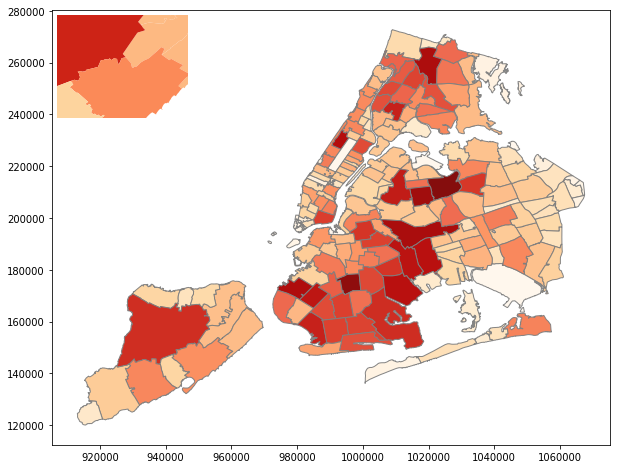

In [96]:
fig, ax = plt.subplots(figsize = (10,8))

# First create the map for the urban share

nyc_map.plot(ax = ax, edgecolor='tab:grey', column='POPULATION', cmap='OrRd', alpha = 0.95)


axins = zoomed_inset_axes(ax, 2, loc=2)  # zoom = 6
nyc_map.plot(ax = axins, column='POPULATION', cmap='OrRd')

x1, x2, y1, y2 = 940000, 960000, 140000, 160000
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#fix the number of ticks on the inset axes
#axins.yaxis.get_major_locator().set_params(nbins=7)
#axins.xaxis.get_major_locator().set_params(nbins=7)

#mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

axins.spines["right"].set_visible(False)
axins.spines["top"].set_visible(False)
axins.spines["left"].set_visible(False)
axins.spines["bottom"].set_visible(False)

#axins.Tick.remove()

axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)

#axins.plot()

plt.show()

In [69]:
axins?

---

### US County Map

In [4]:
path = "C:\\data_bootcamp\\data_bootcamp_spring_2018\\week13\\shape_files\\UScounties"

regions_shape = path + "\\cb_2017_us_county_500k.shx"

In [5]:
us_map = gpd.read_file(regions_shape)

In [7]:
type(us_map)

geopandas.geodataframe.GeoDataFrame

In [6]:
us_map.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,01,005,00161528,0500000US01005,01005,Barbour,06,2292144656,50538698,"POLYGON ((-85.74803199999999 31.619181, -85.74..."
1,01,023,00161537,0500000US01023,01023,Choctaw,06,2365869837,19144469,"POLYGON ((-88.47322699999999 31.893856, -88.46..."
2,01,035,00161543,0500000US01035,01035,Conecuh,06,2201948618,6643480,"POLYGON ((-87.42720399999999 31.26436, -87.425..."
3,01,051,00161551,0500000US01051,01051,Elmore,06,1601762124,99965171,"POLYGON ((-86.41333499999999 32.750591, -86.37..."
4,01,065,00161558,0500000US01065,01065,Hale,06,1667907107,32423356,"POLYGON ((-87.870464 32.762442, -87.868184 32...."


In [13]:
us_map.set_index("STATEFP", inplace = True)

In [49]:
us_map.drop(["02","03","15","43","14","79","78","72","69","60"], inplace = True)

In [50]:
us_map.index.unique()

Index(['01', '04', '05', '06', '08', '09', '11', '12', '13', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '34', '35', '36', '37', '38', '39', '40', '41', '42', '45', '46',
       '47', '48', '49', '51', '53', '54', '55', '56', '10', '32', '33', '44',
       '50'],
      dtype='object', name='STATEFP')

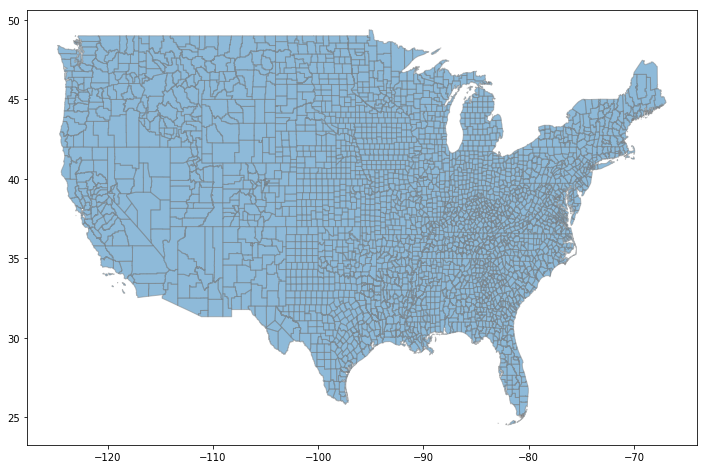

In [53]:
fig, ax = plt.subplots(figsize = (12,8))

# First create the map for the urban share

us_map.plot(ax = ax, edgecolor='tab:grey', alpha = 0.5)

plt.show()

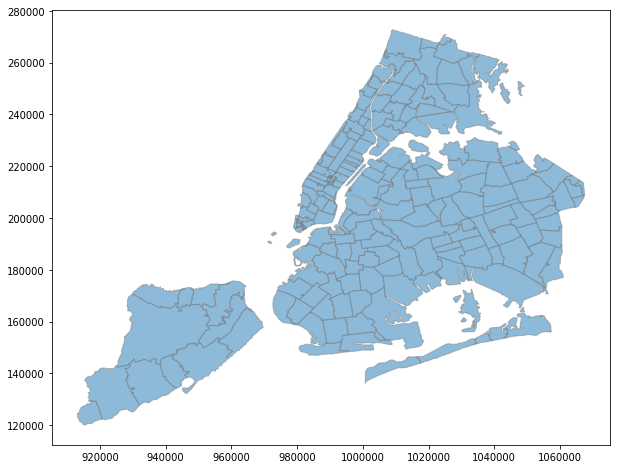

In [16]:
fig, ax = plt.subplots(figsize = (10,8))

# First create the map for the urban share

nyc_map.plot(ax = ax, edgecolor='tab:grey', alpha = 0.5)

plt.show()